In [151]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv('employee_promotion.csv')

In [152]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [153]:
df.shape

(54808, 13)

In [154]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [156]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


# Data Preprocessing

In [157]:
df1 = df.copy()

In [158]:
(df1.isna().sum() / len(df1)) * 100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
awards_won              0.000000
avg_training_score      4.670851
is_promoted             0.000000
dtype: float64

In [159]:
#Filling missing values of continuous variables with the median
df1.age.fillna(df1['age'].median(), inplace=True )

df1.previous_year_rating.fillna(df1['previous_year_rating'].median(),  inplace=True )

df1.avg_training_score.fillna(df1['avg_training_score'].median(), inplace=True )

In [160]:
#Filling missing values of categorical variables with the value which appears the maxium number of times in the column
df1.education.fillna("Bachelor's", inplace=True )

In [161]:
#Dropping employee_Id because each value is unique and it does not help in analysis
df1.drop('employee_id', axis=1, inplace=True)

In [162]:
#Transforming gender into 0 and 1s (binary number)
df1['gender'] = df1['gender'].map({'f': 0, 'm': 1}).astype(int)

## Spliting continous and categorical data 

In [163]:
df_con = df1.select_dtypes(include=['int64', 'float64'])
df_cat = df1.select_dtypes(exclude=['int64', 'float64'])

# Exploratory Data Analysis

## Univariate analysis

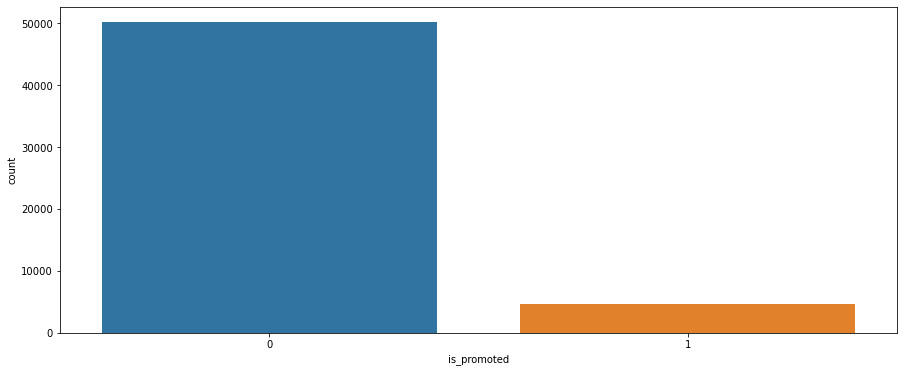

In [164]:
plt.figure(figsize=(15,6))
sns.countplot(x='is_promoted', data=df1);

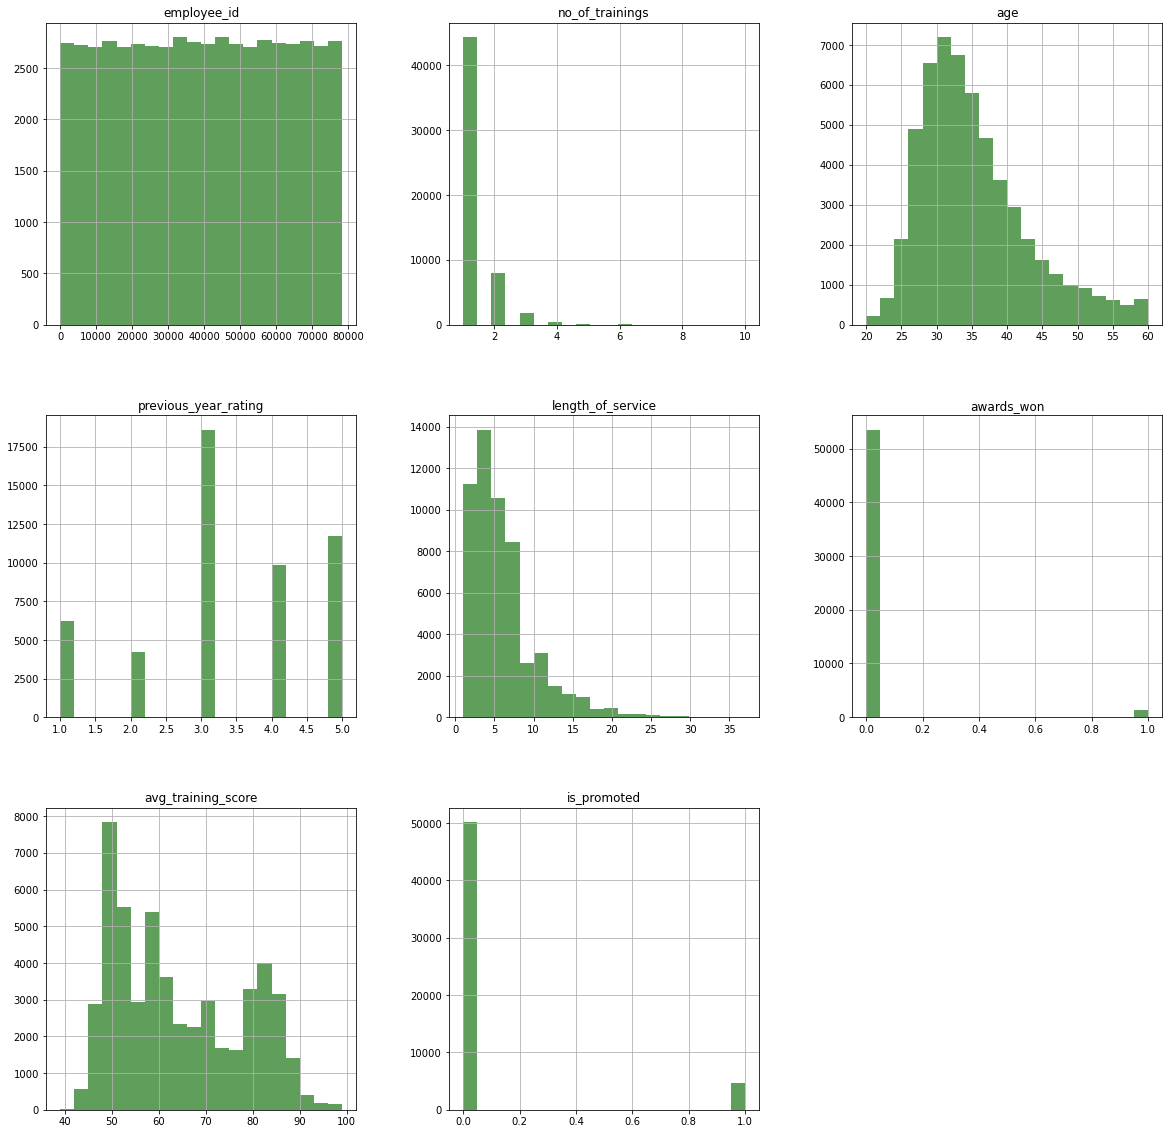

In [165]:
df.hist(figsize=(20,20),bins = 20, color="#107009AA")
plt.title("Numeric Features Distribution")
plt.show()

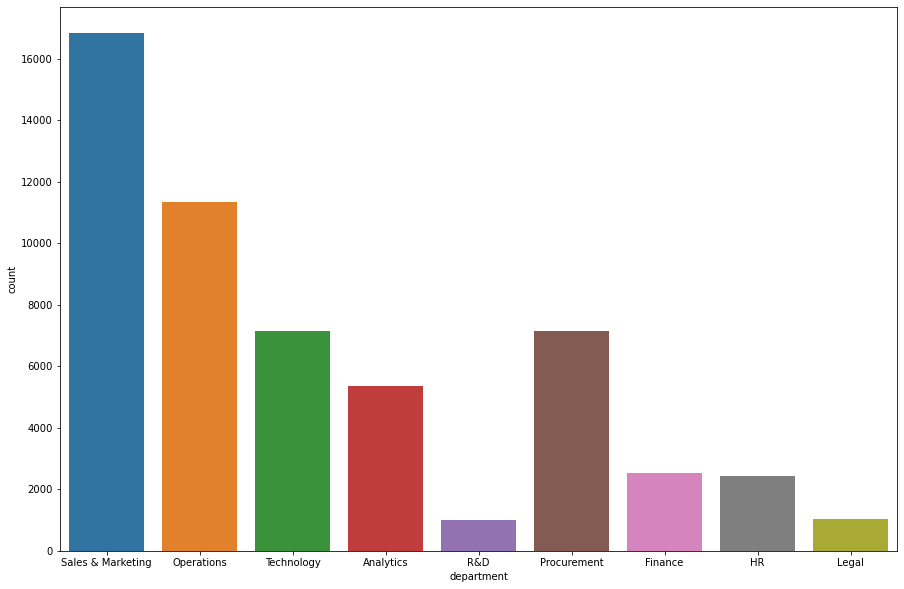

In [166]:
# Department distribution
plt.figure(figsize=(15,10))
sns.countplot(data= df, x = "department")
plt.show()

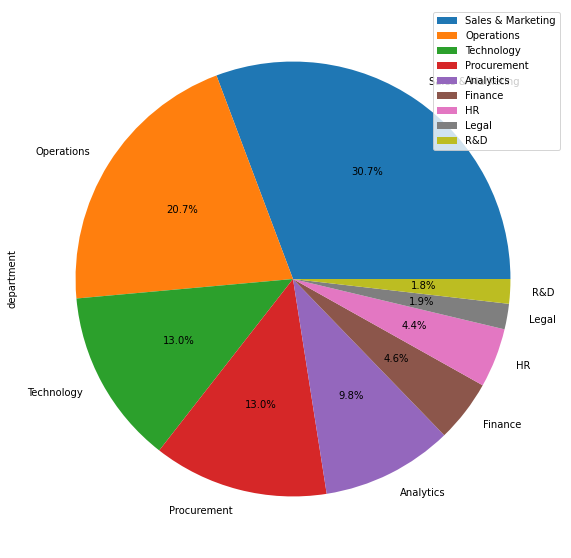

In [167]:
df["department"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10)).legend()

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'region_7'),
  Text(1, 0, 'region_22'),
  Text(2, 0, 'region_19'),
  Text(3, 0, 'region_23'),
  Text(4, 0, 'region_26'),
  Text(5, 0, 'region_2'),
  Text(6, 0, 'region_20'),
  Text(7, 0, 'region_34'),
  Text(8, 0, 'region_1'),
  Text(9, 0, 'region_4'),
  Text(10, 0, 'region_29'),
  Text(11, 0, 'region_31'),
  Text(12, 0, 'region_15'),
  Text(13, 0, 'region_14'),
  Text(14, 0, 'region_11'),
  Text(15, 0, 'region_5'),
  Text(16, 0, 'region_28'),
  Text(17, 0, 'region_17'),
  Text(18, 0, 'region_13'),
  Text(19, 0, 'region_16'),
  Text(20, 0, 'region_25'),
  Text(21, 0, 'region_10'),
  Text(22, 0, 'region_27'),
  Text(23, 0, 'region_30'),
  Text(24, 0, 'region_12'),
  Text(25, 0, 'region_21'),
  Text(26, 0, 'region_8'),
  Text(27, 0, 'region_32'),
  Text(28, 0, 'region_6'),
  Text(29, 0, 'region_33'),
  Text(30, 0, 'region_2

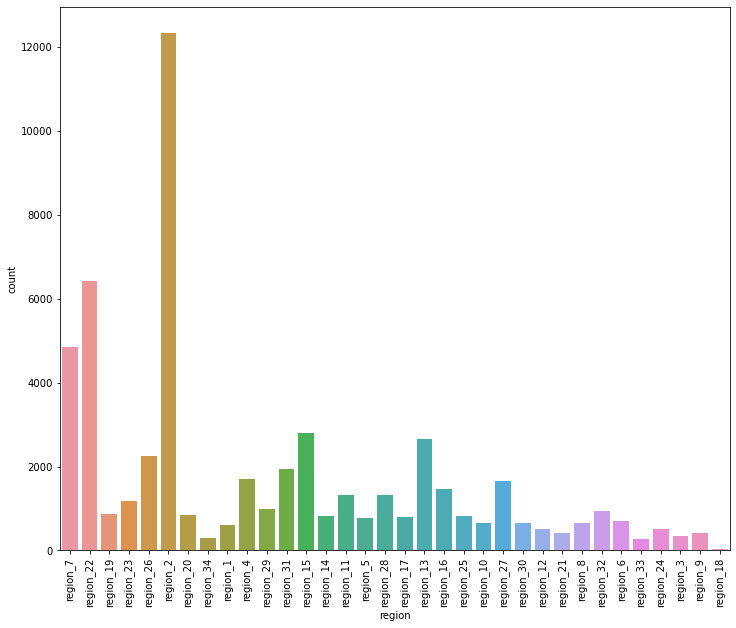

In [168]:
# Regional distribution 
plt.figure(figsize=(12,10))
sns.countplot(df.region)
plt.xticks(rotation=90)

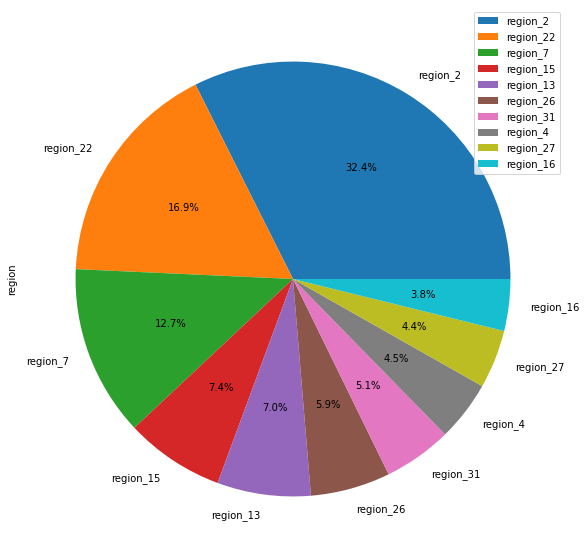

In [169]:
df["region"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

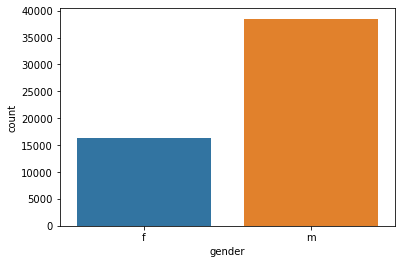

In [170]:
# Gender distribution
sns.countplot( data=df, x = "gender")
plt.show()

### Descriptive statistics

In [171]:
ct1 = pd.DataFrame( df_con.apply( np.mean ) ).T
ct2 = pd.DataFrame( df_con.apply( np.median ) ).T
d1 = pd.DataFrame( df_con.apply( np.std ) ).T
d2 = pd.DataFrame( df_con.apply( min ) ).T
d3 = pd.DataFrame( df_con.apply( max ) ).T
d4 = pd.DataFrame( df_con.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( df_con.apply( lambda x: x.skew() ) ).T

m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std','skew']
m

,attributes,min,max,range,mean,median,std,skew
0,no_of_trainings,1.0,10.0,9.0,1.253011,1.0,0.609258,3.445434
1,age,20.0,60.0,40.0,34.803915,33.0,7.660099,1.007432
2,previous_year_rating,1.0,5.0,4.0,3.304481,3.0,1.214759,-0.260858
3,length_of_service,1.0,37.0,36.0,5.865512,5.0,4.265055,1.738061
4,awards_won,0.0,1.0,1.0,0.023172,0.0,0.150449,6.338914
5,avg_training_score,39.0,99.0,60.0,63.538845,60.0,13.225432,0.465344
6,is_promoted,0.0,1.0,1.0,0.085170,0.0,0.279135,2.972339


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

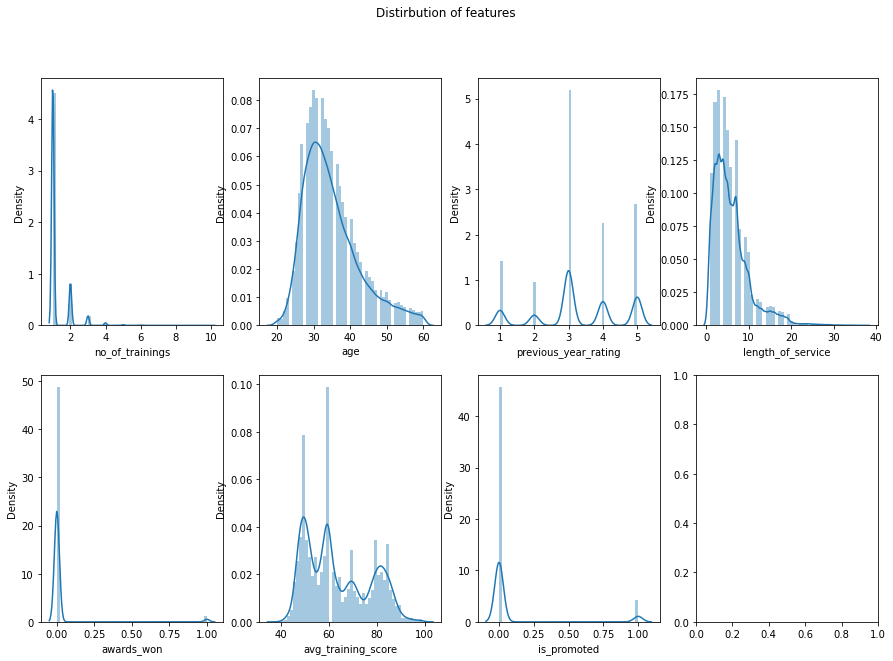

In [172]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))

for i, feature in enumerate(df_con):
    row = int(i/4)
    col = i%4
    sns.distplot(df_con.iloc[:, i], ax=axs[row][col])

plt.suptitle('Distirbution of features')
plt.tight_layout

# Plots reveal that the columns age, length_Of_service and avg_training_score don't have a normal curve.
#Hence, I'll have to use log for normalization

### Categorical variable

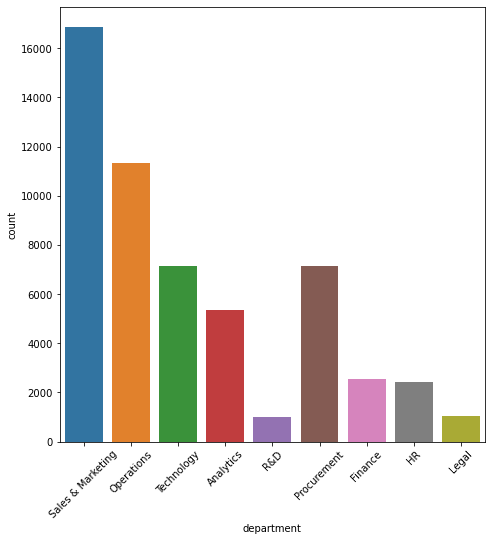

In [173]:
plt.figure(figsize=(35,8));
plt.subplot( 1, 4, 1 );
sns.countplot(x='department', data=df_cat);
plt.xticks(rotation=45);

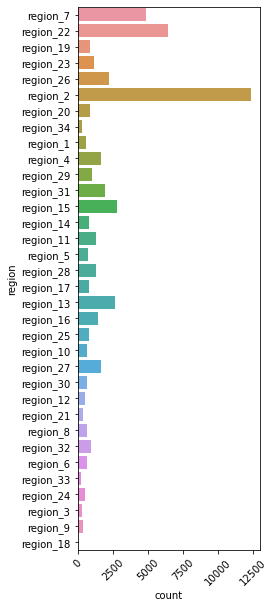

In [174]:
plt.figure(figsize = (15,10))
plt.subplot( 1, 4, 2 );
sns.countplot( y='region',  data=df_cat);
plt.xticks(rotation=45);

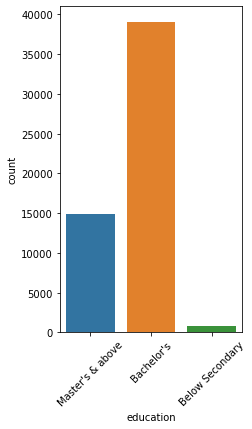

In [175]:
plt.figure(figsize = (15,6))
plt.subplot( 1, 4, 3 );
sns.countplot( x='education', data=df_cat);
plt.xticks(rotation=45);

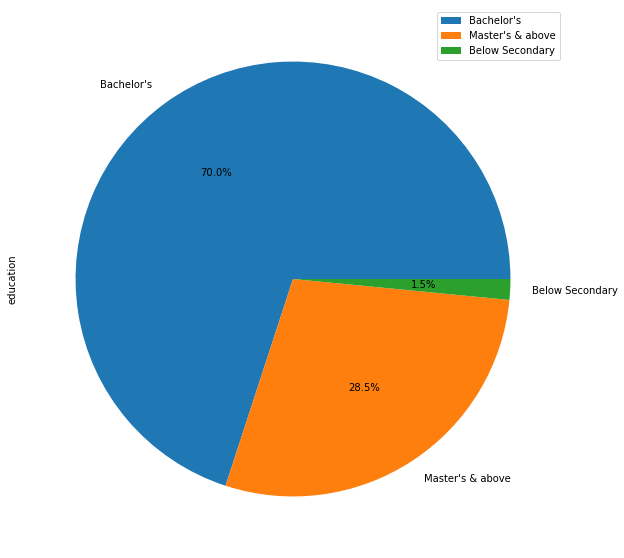

In [176]:
df["education"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

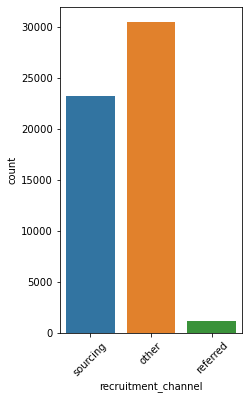

In [177]:
plt.figure(figsize = (15,6))
plt.subplot( 1, 4, 4 );
sns.countplot( x='recruitment_channel', data=df_cat);
plt.xticks(rotation=45);

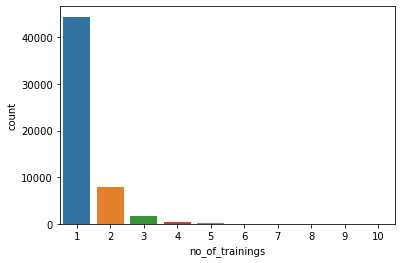

In [111]:
sns.countplot(data= df, x = "no_of_trainings")
plt.show()

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, '20'),
  Text(1, 0, '21'),
  Text(2, 0, '22'),
  Text(3, 0, '23'),
  Text(4, 0, '24'),
  Text(5, 0, '25'),
  Text(6, 0, '26'),
  Text(7, 0, '27'),
  Text(8, 0, '28'),
  Text(9, 0, '29'),
  Text(10, 0, '30'),
  Text(11, 0, '31'),
  Text(12, 0, '32'),
  Text(13, 0, '33'),
  Text(14, 0, '34'),
  Text(15, 0, '35'),
  Text(16, 0, '36'),
  Text(17, 0, '37'),
  Text(18, 0, '38'),
  Text(19, 0, '39'),
  Text(20, 0, '40'),
  Text(21, 0, '41'),
  Text(22, 0, '42'),
  Text(23, 0, '43'),
  Text(24, 0, '44'),
  Text(25, 0, '45'),
  Text(26, 0, '46'),
  Text(27, 0, '47'),
  Text(28, 0, '48'),
  Text(29, 0, '49'),
  Text(30, 0, '50'),
  Text(31, 0, '51'),
  Text(32, 0, '52'),
  Text(33, 0, '53'),
  Text(34, 0, '54'),
  Text(35, 0, '55'),
  Text(36, 0, '56'),
  Text(37, 0, '57'),
  Text(38, 0, '58'),
 

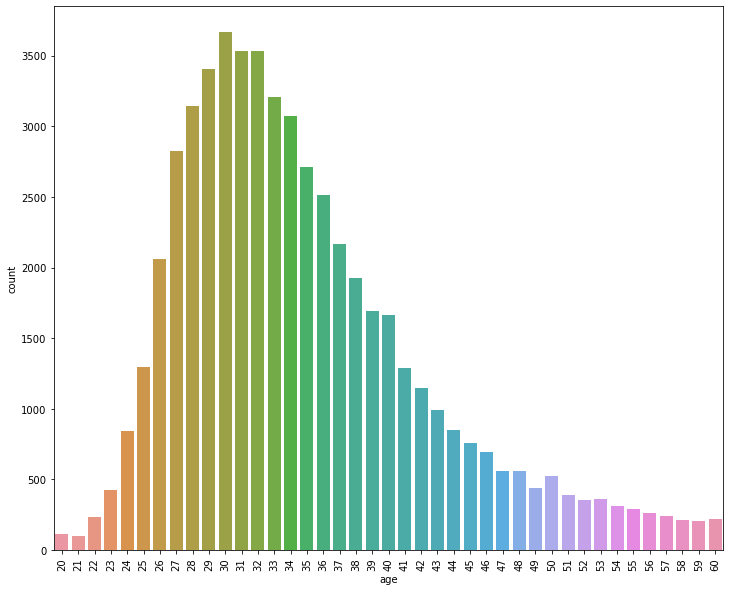

In [113]:
#Age distribution
plt.figure(figsize=(12,10))
sns.countplot(df.age)
plt.xticks(rotation=90)

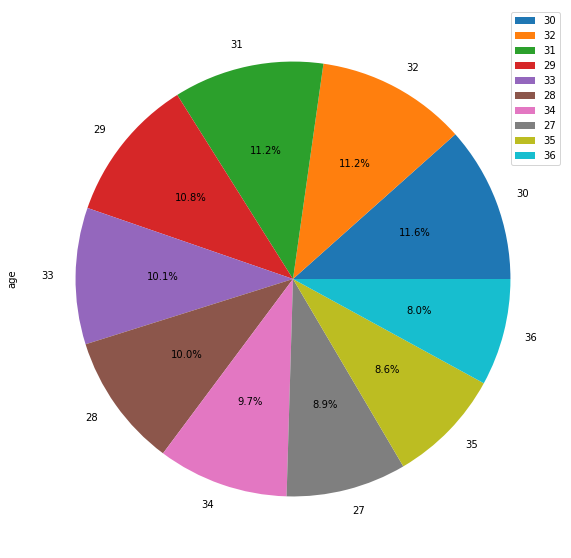

In [115]:
df["age"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

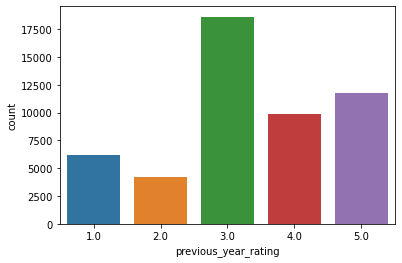

In [116]:
# Previous year rating distribution 
sns.countplot(data= df, x = "previous_year_rating")
plt.show()

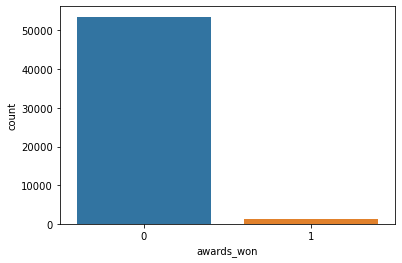

In [118]:
# Awards won distribution
sns.countplot(data= df, x = "awards_won")
plt.show()

In [178]:
df["is_promoted"].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

## Bivariate Analysis

In [179]:
df1.sample()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
39345,Analytics,region_2,Master's & above,1,sourcing,2,40,5.0,12,0,86.0,0


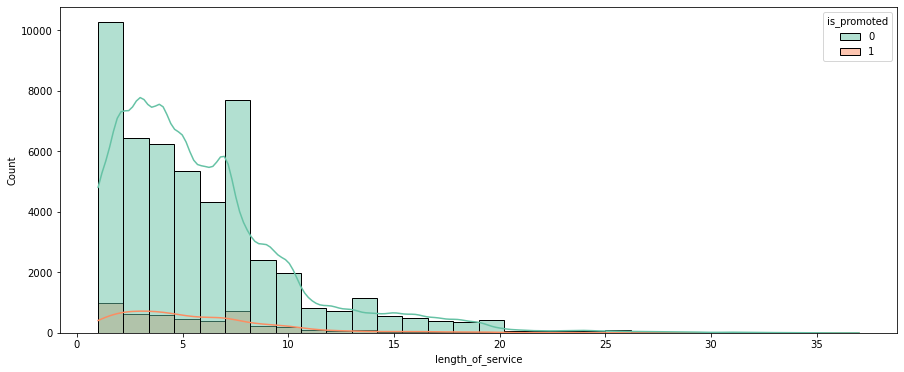

In [180]:
plt.figure(figsize=(15,6))
sns.histplot(x='length_of_service', hue='is_promoted', data=df1, palette='Set2', bins=30, kde=True);

<AxesSubplot:xlabel='education', ylabel='count'>

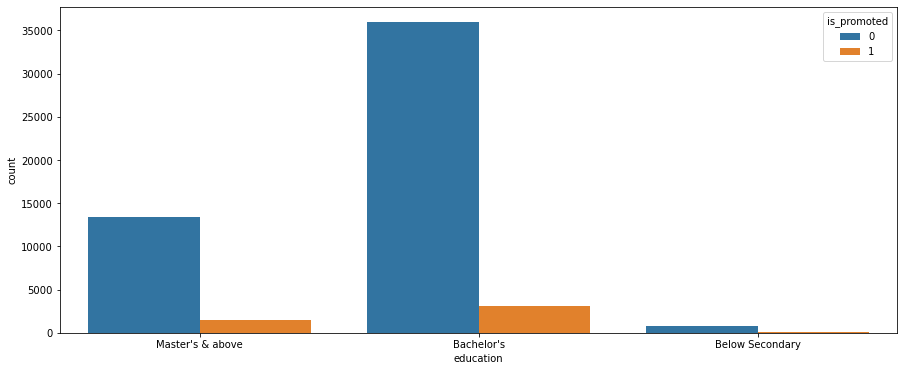

In [43]:
plt.figure(figsize=(15,6))
sns.countplot(x='education', hue='is_promoted', data=df1)

<AxesSubplot:xlabel='age', ylabel='Count'>

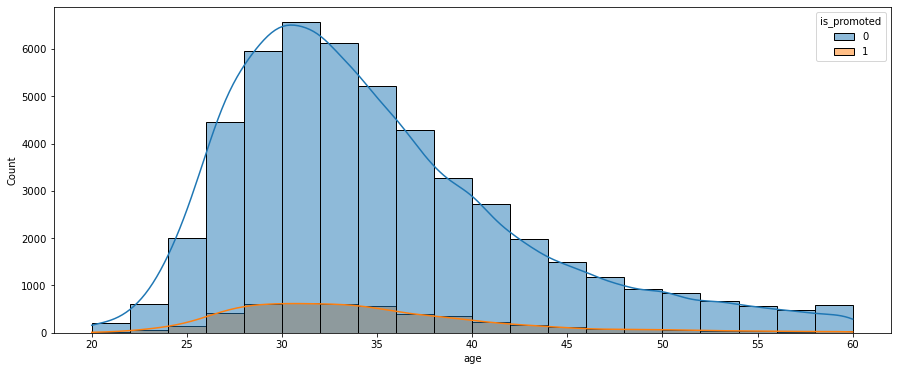

In [44]:
plt.figure(figsize=(15,6))
sns.histplot(x='age', hue='is_promoted', data=df1, bins=20, kde=True)

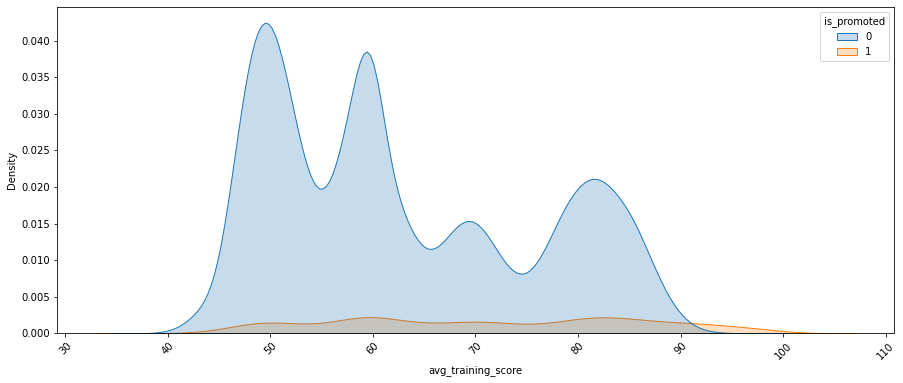

In [45]:
plt.figure(figsize=(15,6))
sns.kdeplot(x='avg_training_score', hue='is_promoted', data=df1, shade=True)
plt.xticks(rotation=45);

## Multivariate analysis

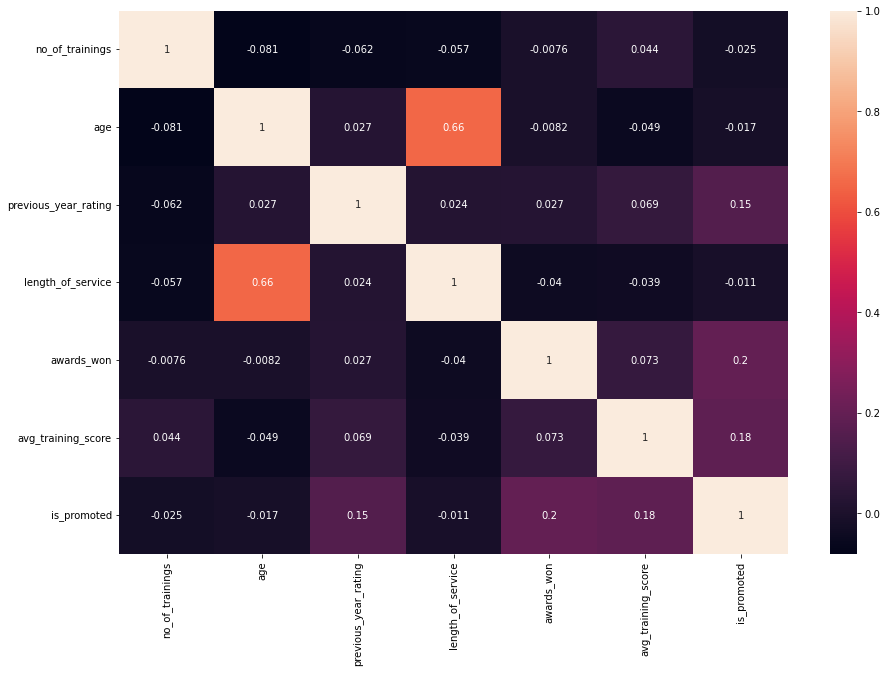

In [48]:
plt.figure(figsize=(15,10))
correlation = df_con.corr( method='pearson' )
sns.heatmap( correlation, annot=True );

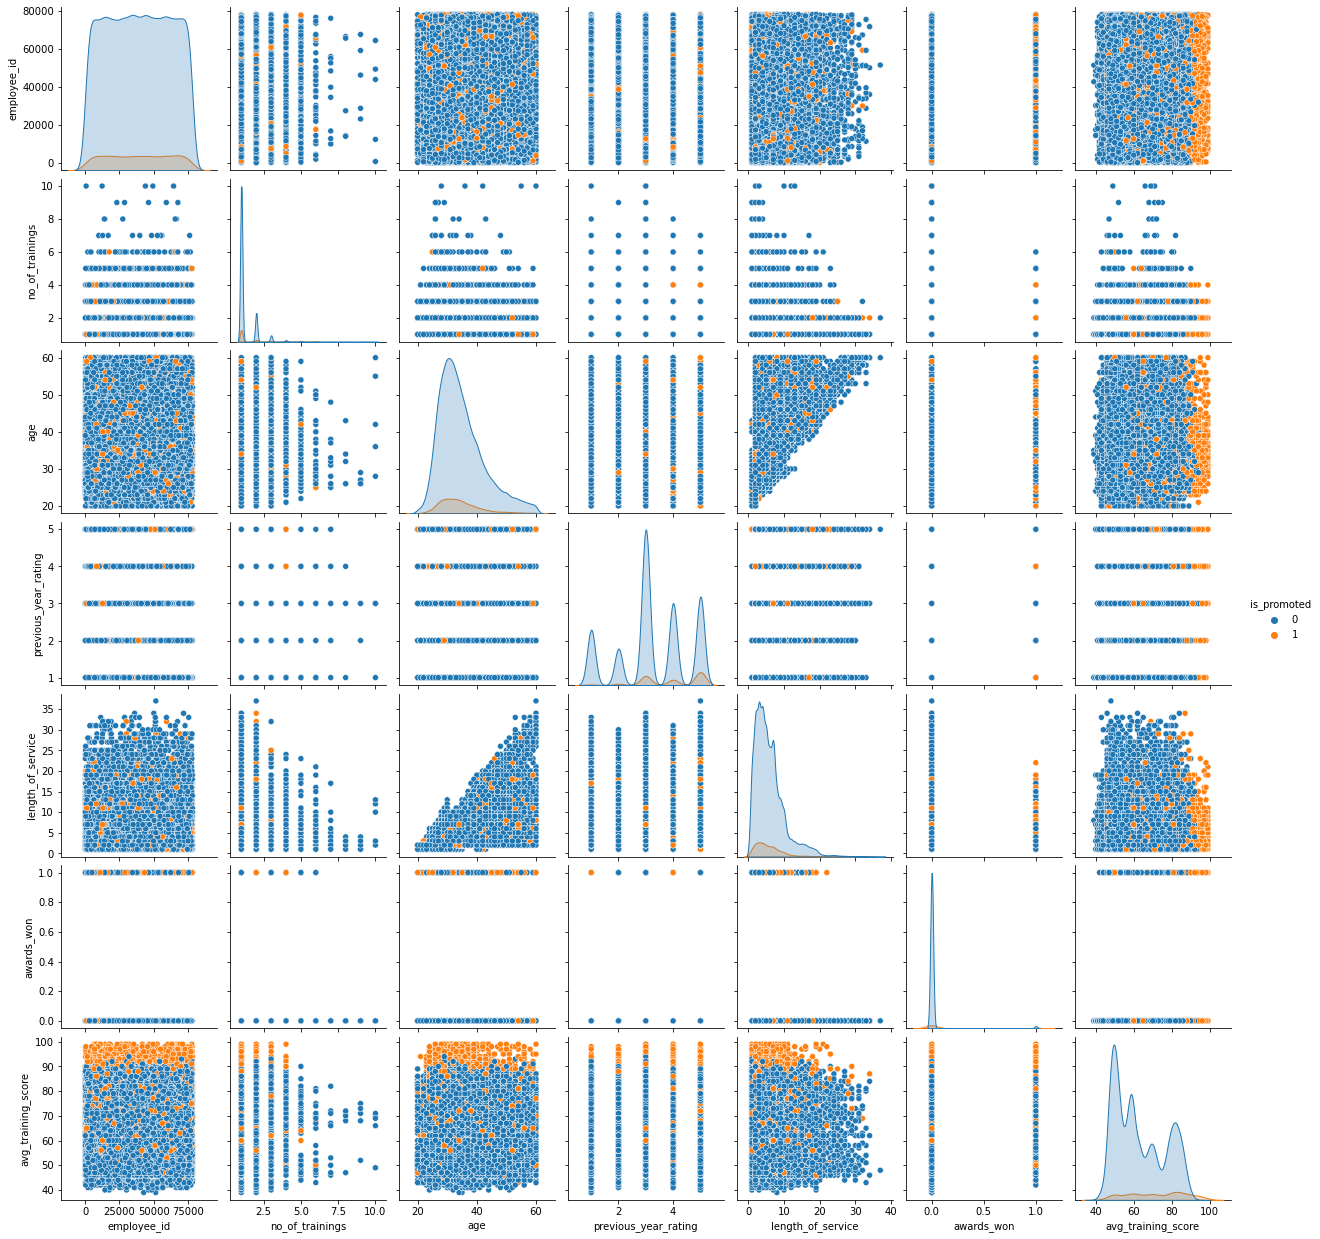

In [121]:
sns.pairplot(df,diag_kind='kde',hue='is_promoted')

# Data Preparation

In [181]:
dfcat = df_cat.copy()
dfnum = df_con.drop('is_promoted', axis=1)

## One Hot Encoder

In [182]:
pip install category_encoders

In [183]:
import category_encoders as ce
OHE = ce.OneHotEncoder(cols= ['department','region', 'education', 'recruitment_channel'],use_cat_names=True)

dfcat = OHE.fit_transform(dfcat)

In [140]:
df_all = pd.concat([dfnum, dfcat], axis= 1)

In [141]:
X = df_all.copy()
y = df1['is_promoted']

## Data Scaling

In [184]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = df_all.columns)

## Making train and test data 

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

# Logistic Regression

In [186]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [187]:
y_pred = log_reg.predict(X_test)

In [188]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
print("Confusion matrix: ", confusion_matrix(y_test,y_pred))
print("\nAccuracy score: ", accuracy_score(y_test,y_pred))
print("\nRecall  score: ", recall_score(y_test,y_pred))
print("\nPrecision score: ", precision_score(y_test,y_pred))
#Logistic Regression is a very good fit

Confusion matrix:  [[15030    28]
 [ 1039   346]]

Accuracy score:  0.9351091649942225

Recall  score:  0.24981949458483754

Precision score:  0.9251336898395722


# Decision Tree 

In [197]:
from sklearn.tree import DecisionTreeRegressor

emp_model = DecisionTreeRegressor(random_state=1)
emp_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [198]:
y_pred = emp_model.predict(X_test)

In [191]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.11382756593484562

In [192]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

0.3370477632317628

In [201]:
#Calculating the score
print(emp_model.score(X_test, y_test))

-0.4727463195259918


# Random Forests

In [85]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [86]:
y_pred = rf.predict(X_test)

In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[14970,    88],
       [ 1033,   352]], dtype=int64)

In [94]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Recall  score: ", recall_score(y_test,y_pred))
print("Precision score: ", precision_score(y_test,y_pred))

Accuracy score:  0.931825092744633
Recall  score:  0.25415162454873647
Precision score:  0.8
